### Implementation

Below are the implementations of the given solvers and my own implemented eulers method. <br>
For both test cases I created the functions using the parameters and functions given, then fed the function either into the solver or my eulers method. <br>
For test case a I was able to calculate the absolute and relative error as the exact solutions were give, however were not given for part b.

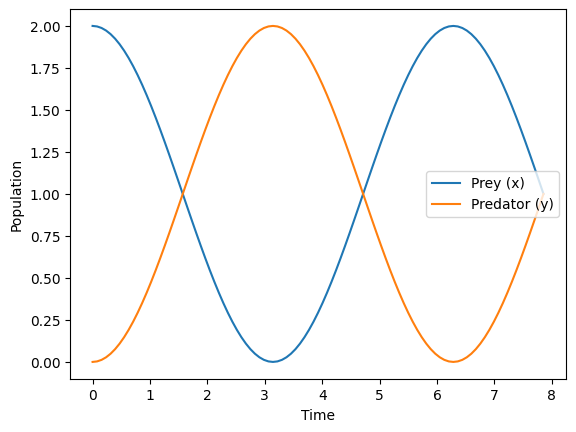

Method chosen: 3/8-rule
dt/timestep: 100 
Solving took 0.005013942718505859 seconds.
Prey Absolute Error: 5.329483181895638e-06
Prey Relative Error: 0.009914175108828716
Predator Absolute Error: 1.6839212241420512e-06
Predator Relative Error: 0.009923802468696945


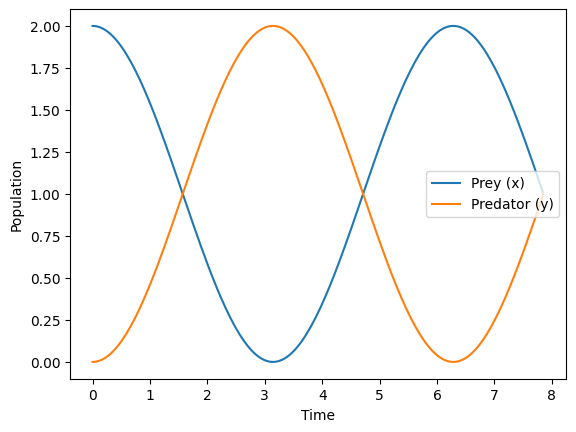

Method chosen: 3/8-rule
dt/timestep: 200 
Solving took 0.009974241256713867 seconds.
Prey Absolute Error: 3.353867191031815e-07
Prey Relative Error: 0.004969275692015674
Predator Absolute Error: 1.0642567666865335e-07
Predator Relative Error: 0.004974380705913474


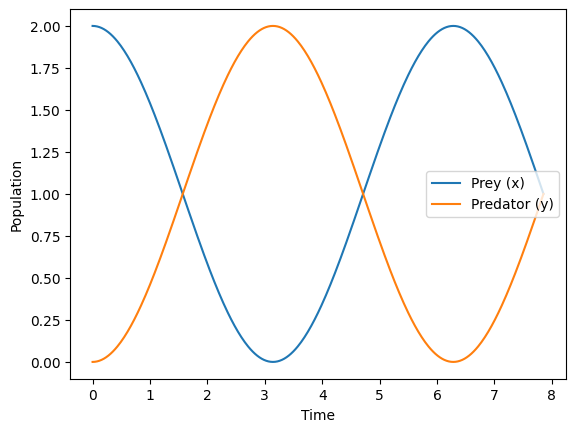

Method chosen: 3/8-rule
dt/timestep: 400 
Solving took 0.020943641662597656 seconds.
Prey Absolute Error: 2.1041309365026412e-08
Prey Relative Error: 0.0024358183570934323
Predator Absolute Error: 6.694033465882291e-09
Predator Relative Error: 0.002465146383976678


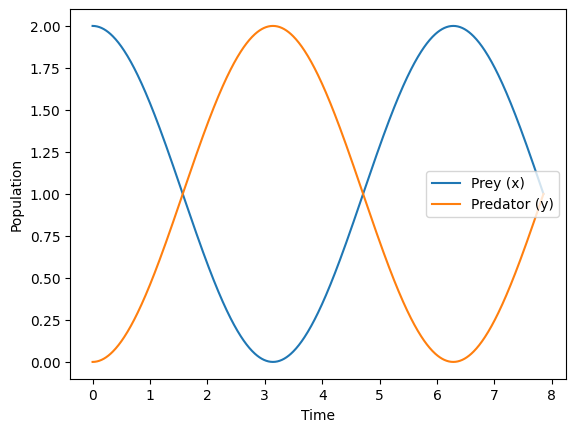

Method chosen: 3/8-rule
dt/timestep: 800 
Solving took 0.03989386558532715 seconds.
Prey Absolute Error: 1.3175634431387194e-09
Prey Relative Error: 0.0009041308889532689
Predator Absolute Error: 4.197456110301806e-10
Predator Relative Error: 0.0010507919817667657


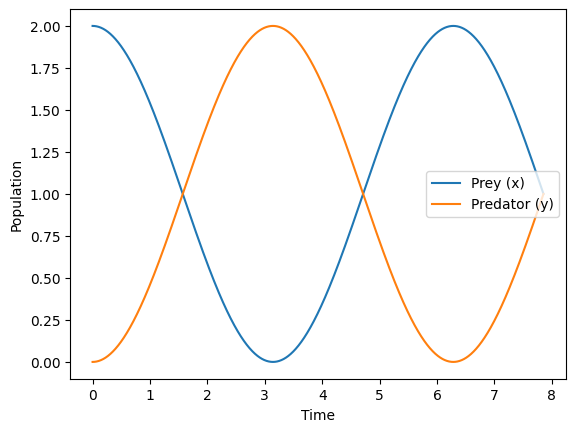

Method chosen: 3/8-rule
dt/timestep: 1600 
Solving took 0.08178114891052246 seconds.
Prey Absolute Error: 8.230131175464922e-11
Prey Relative Error: 8.812156155804882e-05
Predator Absolute Error: 2.625856638375839e-11
Predator Relative Error: 0.00015564560942365544


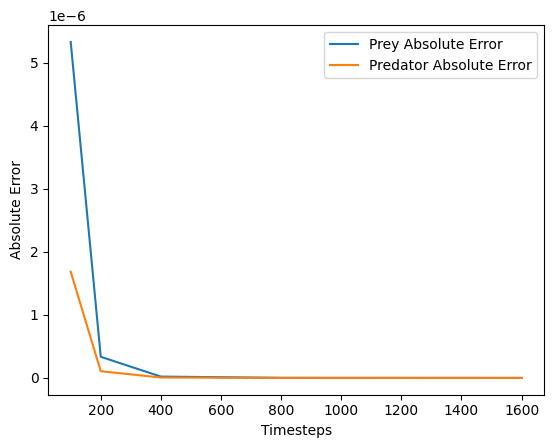

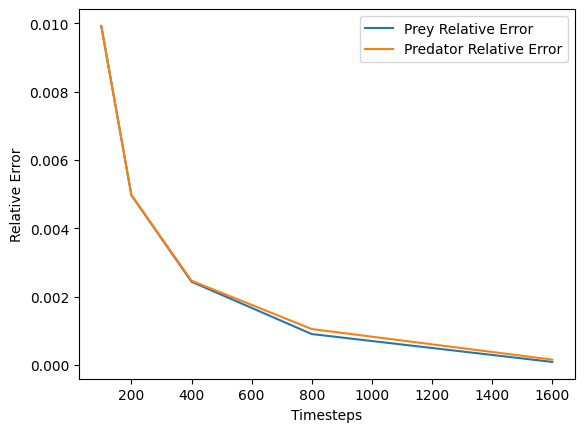

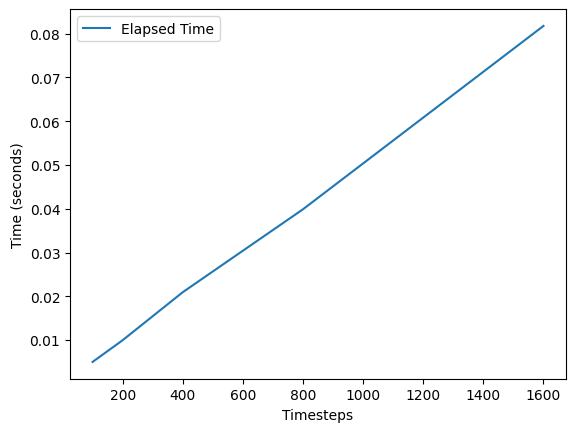

In [1]:
from solvers import solver
import numpy as np
import matplotlib.pyplot as plt
import time

def predator_prey_rhs_a(t, y):
    alpha = 1.0
    beta = 1.0
    gamma = 1.0
    delta = 1.0

    f_t = -np.sin(t) - (np.cos(t))**2 - np.cos(t)
    g_t = np.sin(t) + (np.cos(t))**2 - np.cos(t)

    dx_dt = alpha * y[0] - beta * y[0] * y[1] + f_t
    dy_dt = delta * y[0] * y[1] - gamma * y[1] + g_t

    return np.array([dx_dt, dy_dt])

def predator_prey_rhs_b(t, y):
    alpha = 2/3
    beta = 4/3
    gamma = 1.0
    delta = 1.0

    f_t = 0
    g_t = 0

    dx_dt = alpha * y[0] - beta * y[0] * y[1] + f_t
    dy_dt = delta * y[0] * y[1] - gamma * y[1] + g_t

    return np.array([dx_dt, dy_dt])

# the timesteps to test
timesteps = [100, 200, 400, 800, 1600]

prey_errors_abs = []
predator_errors_abs = []
prey_errors_rel = []
predator_errors_rel = []
elapsed_times = []

# set up conditions
initial_conditions_a = np.array([2.0, 0.0])
T_a = 2.5 * np.pi  # final time
t0_a= 0.0  # time 0

# testing all conditions
for step in timesteps:

    dt_a = T_a / step  # timestep

    # setting up the timing and using the solver
    start_time = time.time()
    method = "3/8-rule" 
    t_a, y_a = solver(predator_prey_rhs_a, initial_conditions_a, t0_a, dt_a, T_a, method)
    end_time = time.time()

    # display the graph
    y_a = np.array(y_a)
    plt.plot(t_a, y_a[:, 0], label="Prey (x)")
    plt.plot(t_a, y_a[:, 1], label="Predator (y)")
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.legend()
    plt.show()

    # printing out the time for the calculation
    elapsed_time = end_time - start_time
    print(f"Method chosen: {method}")
    print(f"dt/timestep: {step} ")
    print(f"Solving took {elapsed_time} seconds.")

    # calculating error
    # by subtracting the expected value from the recieved value
    prey_error_abs = np.abs(y_a[:, 0] - (1 + np.cos(t_a)))
    predator_error_abs = np.abs(y_a[:, 1] - (1 - np.cos(t_a)))

    # adding a small epsilon to avoid division by zero
    epsilon = 1e-10

    # calculate the relative error by taking the mean of the ratio of the absolute corresponding value
    # plus adding the epsilion in case we divide by 0
    prey_error_rel = np.mean(prey_error_abs / (np.abs(y_a[:, 0]) + epsilon))
    predator_error_rel = np.mean(predator_error_abs / (np.abs(y_a[:, 1]) + epsilon))

    # Append errors and elapsed time to lists
    prey_errors_abs.append(np.mean(prey_error_abs))
    predator_errors_abs.append(np.mean(predator_error_abs))
    prey_errors_rel.append(prey_error_rel)
    predator_errors_rel.append(predator_error_rel)
    elapsed_times.append(end_time - start_time)

    print(f"Prey Absolute Error: {np.mean(prey_error_abs)}")
    print(f"Prey Relative Error: {prey_error_rel}")
    print(f"Predator Absolute Error: {np.mean(predator_error_abs)}")
    print(f"Predator Relative Error: {predator_error_rel}")

# Plotting errors
plt.plot(timesteps, prey_errors_abs, label="Prey Absolute Error")
plt.plot(timesteps, predator_errors_abs, label="Predator Absolute Error")
plt.xlabel("Timesteps")
plt.ylabel("Absolute Error")
plt.legend()
plt.show()

plt.plot(timesteps, prey_errors_rel, label="Prey Relative Error")
plt.plot(timesteps, predator_errors_rel, label="Predator Relative Error")
plt.xlabel("Timesteps")
plt.ylabel("Relative Error")
plt.legend()
plt.show()

# Plotting elapsed times
plt.plot(timesteps, elapsed_times, label="Elapsed Time")
plt.xlabel("Timesteps")
plt.ylabel("Time (seconds)")
plt.legend()
plt.show()


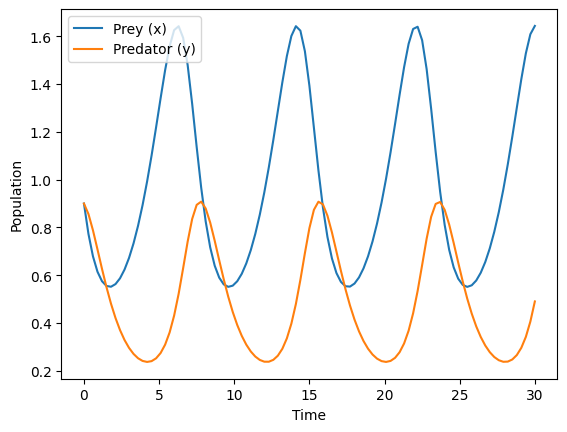

Solving took 0.003989458084106445 seconds.
Method chosen: 3/8-rule
dt/timestep: 100


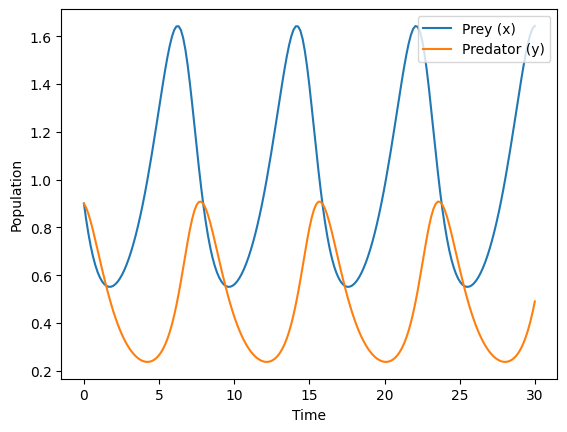

Solving took 0.00698089599609375 seconds.
Method chosen: 3/8-rule
dt/timestep: 200


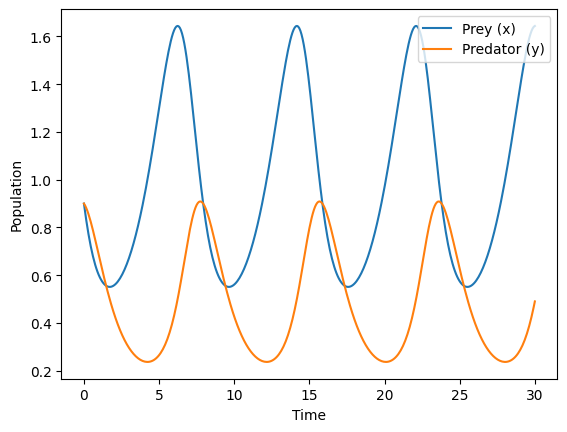

Solving took 0.01396322250366211 seconds.
Method chosen: 3/8-rule
dt/timestep: 400


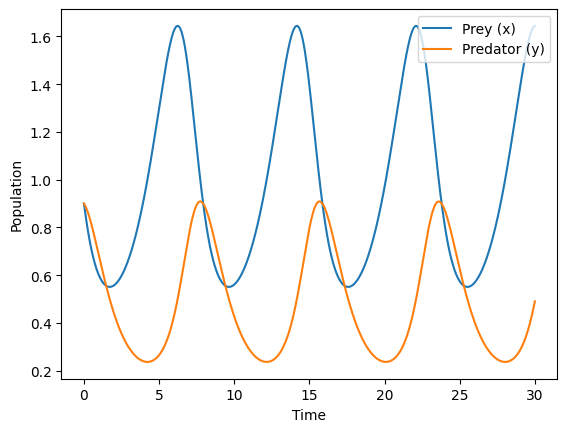

Solving took 0.027925729751586914 seconds.
Method chosen: 3/8-rule
dt/timestep: 800


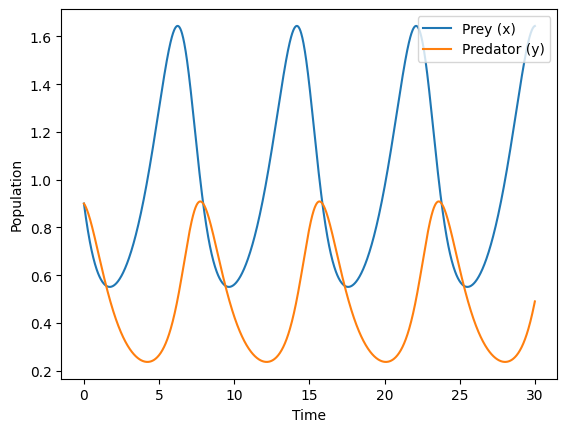

Solving took 0.05585074424743652 seconds.
Method chosen: 3/8-rule
dt/timestep: 1600


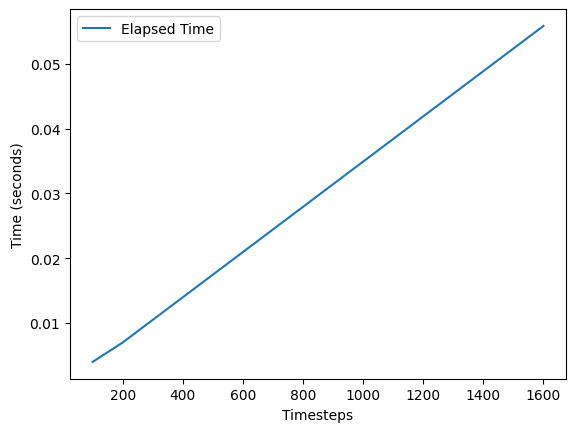

In [2]:
def predator_prey_rhs_b(t, y):
    alpha = 2/3
    beta = 4/3
    gamma = 1.0
    delta = 1.0

    f_t = 0
    g_t = 0

    dx_dt = alpha * y[0] - beta * y[0] * y[1] + f_t
    dy_dt = delta * y[0] * y[1] - gamma * y[1] + g_t

    return np.array([dx_dt, dy_dt])

# the timesteps to test
timesteps = [100, 200, 400, 800, 1600]
elapsed_times = []

# set up initial conditions
initial_conditions_b = np.array([0.9, 0.9])
T_b = 30  # final time
t0_b = 0.0  # time 0

for steps in timesteps: 
    dt_b = T_b / steps  # timestep

    # choose method then solve
    method = "3/8-rule"
    start_time = time.time()
    t_b, y_b = solver(predator_prey_rhs_b, initial_conditions_b, t0_b, dt_b, T_b, method)
    end_time = time.time()

    y_b = np.array(y_b)
    plt.plot(t_b, y_b[:, 0], label="Prey (x)")
    plt.plot(t_b, y_b[:, 1], label="Predator (y)")
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.legend()
    plt.show()

    elapsed_time = end_time - start_time
    print(f"Solving took {elapsed_time} seconds.")
    print(f"Method chosen: {method}")
    print(f"dt/timestep: {steps}")

    # Append errors and elapsed time to lists
    elapsed_times.append(end_time - start_time)

# Plotting elapsed times
plt.plot(timesteps, elapsed_times, label="Elapsed Time")
plt.xlabel("Timesteps")
plt.ylabel("Time (seconds)")
plt.legend()
plt.show()


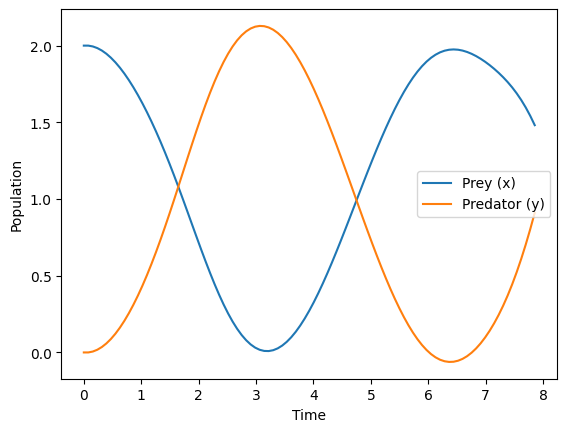

dt/timestep: 100 
Solving took 0.001994609832763672 seconds.
Prey Absolute Error: 0.08767568346649879
Prey Relative Error: 0.12633758295998426
Predator Absolute Error: 0.07000969516982726
Predator Relative Error: 305215.52356599114


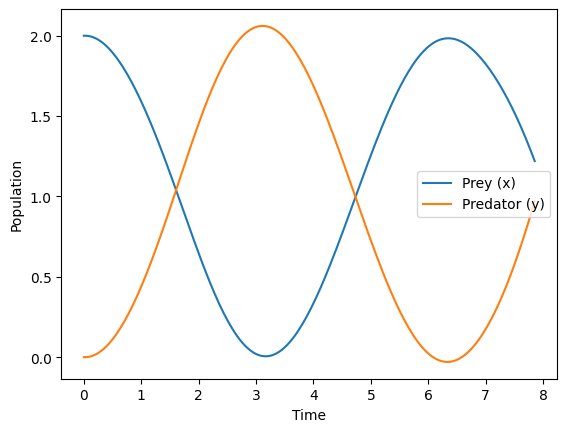

dt/timestep: 200 
Solving took 0.001994609832763672 seconds.
Prey Absolute Error: 0.04285087018233246
Prey Relative Error: 0.07881334378536309
Predator Absolute Error: 0.0338439003220605
Predator Relative Error: 38356.82301453856


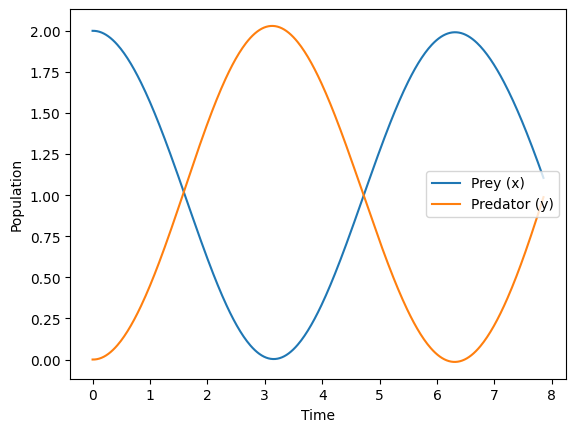

dt/timestep: 400 
Solving took 0.0029909610748291016 seconds.
Prey Absolute Error: 0.021202148718914408
Prey Relative Error: 0.04974646863063382
Predator Absolute Error: 0.016656536971596393
Predator Relative Error: 4807.400316134684


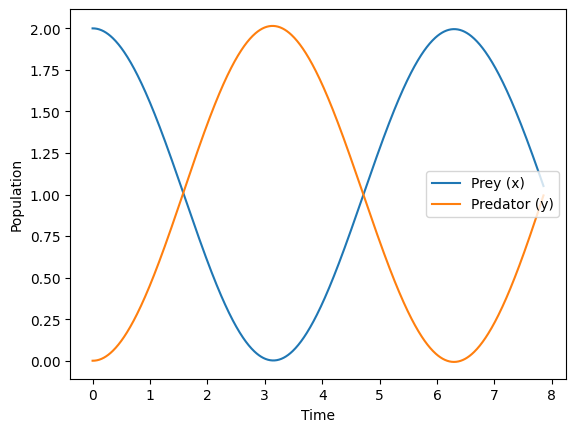

dt/timestep: 800 
Solving took 0.0069811344146728516 seconds.
Prey Absolute Error: 0.010548092086151026
Prey Relative Error: 0.031848578352677064
Predator Absolute Error: 0.008264437602321578
Predator Relative Error: 601.8663307796874


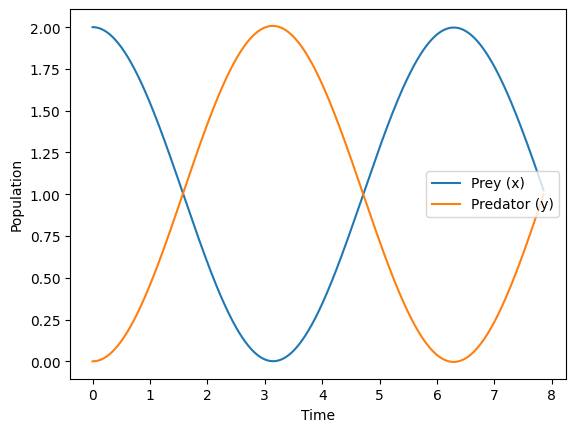

dt/timestep: 1600 
Solving took 0.012963056564331055 seconds.
Prey Absolute Error: 0.005261165506737418
Prey Relative Error: 0.020727502417715003
Predator Absolute Error: 0.004116568742687019
Predator Relative Error: 75.41622936349086


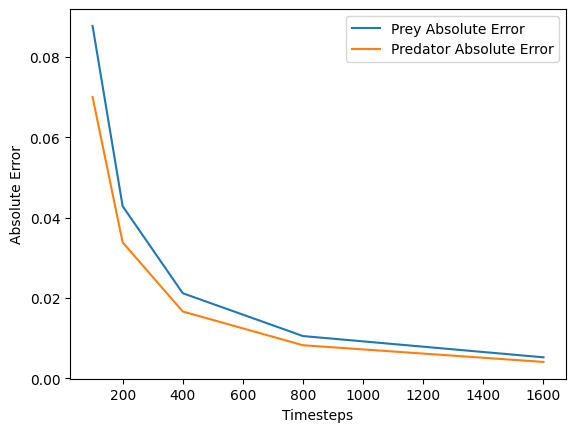

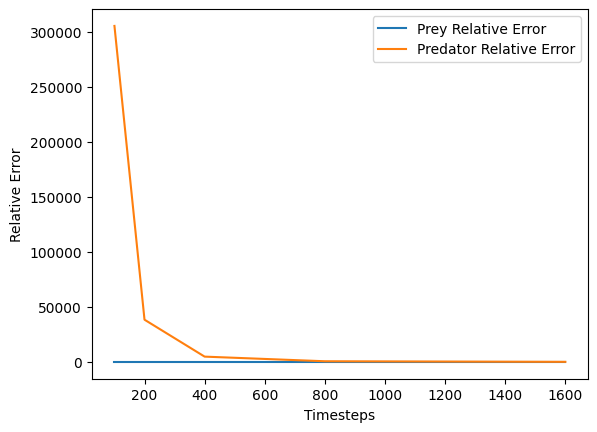

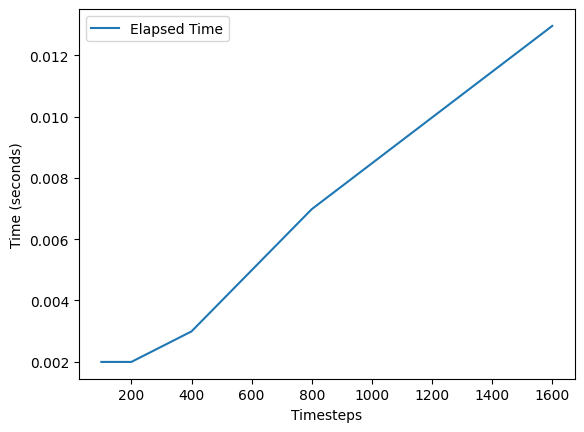

In [4]:
def eulers_theorem(rhs, y0, t0, dt, T):
    # calculate number of iterations
    steps = int(T / dt)
    y_out = np.empty((steps + 1, len(y0)))
    t_out = np.empty(steps + 1)

    # initial values
    y_out[0, :] = y0
    t_out[0] = t0

    # perform Euler's method iterations
    for i in range(steps):
        t_out[i+1] = t_out[i] + dt
        y_out[i+1, :] = y_out[i, :] + dt * rhs(t_out[i], y_out[i, :])

    return t_out, y_out

# the timesteps to test
timesteps = [100, 200, 400, 800, 1600]
prey_errors_abs = []
predator_errors_abs = []
prey_errors_rel = []
predator_errors_rel = []
elapsed_times = []

initial_conditions_a = np.array([2.0, 0.0])
T_a = 2.5 * np.pi  # final time
t0_a= 0.0  # time 0

# testing all conditions
for step in timesteps:

    dt_a = T_a / step  # timestep
    # setting up the timing and using the solver
    start_time = time.time()
    method = "3/8-rule" 
    t_a, y_a = eulers_theorem(predator_prey_rhs_a, initial_conditions_a, t0_a, dt_a, T_a)
    end_time = time.time()

    # display the graph
    y_a = np.array(y_a)
    plt.plot(t_a, y_a[:, 0], label="Prey (x)")
    plt.plot(t_a, y_a[:, 1], label="Predator (y)")
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.legend()
    plt.show()

    # printing out the time for the calculation
    elapsed_time = end_time - start_time
    print(f"dt/timestep: {step} ")
    print(f"Solving took {elapsed_time} seconds.")

    # calculating error
    # by subtracting the expected value from the recieved value
    prey_error_abs = np.abs(y_a[:, 0] - (1 + np.cos(t_a)))
    predator_error_abs = np.abs(y_a[:, 1] - (1 - np.cos(t_a)))

    # adding a small epsilon to avoid division by zero
    epsilon = 1e-10

    # calculate the relative error by taking the mean of the ratio of the absolute corresponding value
    # plus adding the epsilion in case we divide by 0
    prey_error_rel = np.mean(prey_error_abs / (np.abs(y_a[:, 0]) + epsilon))
    predator_error_rel = np.mean(predator_error_abs / (np.abs(y_a[:, 1]) + epsilon))

    print(f"Prey Absolute Error: {np.mean(prey_error_abs)}")
    print(f"Prey Relative Error: {prey_error_rel}")
    print(f"Predator Absolute Error: {np.mean(predator_error_abs)}")
    print(f"Predator Relative Error: {predator_error_rel}")

    # Append errors and elapsed time to lists
    prey_errors_abs.append(np.mean(prey_error_abs))
    predator_errors_abs.append(np.mean(predator_error_abs))
    prey_errors_rel.append(prey_error_rel)
    predator_errors_rel.append(predator_error_rel)
    elapsed_times.append(end_time - start_time)

# Plotting errors
plt.plot(timesteps, prey_errors_abs, label="Prey Absolute Error")
plt.plot(timesteps, predator_errors_abs, label="Predator Absolute Error")
plt.xlabel("Timesteps")
plt.ylabel("Absolute Error")
plt.legend()
plt.show()

plt.plot(timesteps, prey_errors_rel, label="Prey Relative Error")
plt.plot(timesteps, predator_errors_rel, label="Predator Relative Error")
plt.xlabel("Timesteps")
plt.ylabel("Relative Error")
plt.legend()
plt.show()

# Plotting elapsed times
plt.plot(timesteps, elapsed_times, label="Elapsed Time")
plt.xlabel("Timesteps")
plt.ylabel("Time (seconds)")
plt.legend()
plt.show()

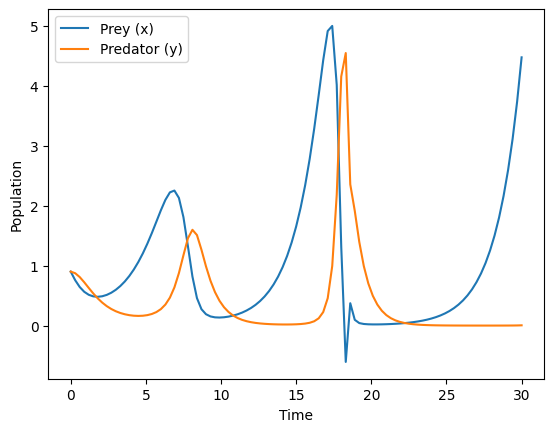

Solving took 0.000997304916381836 seconds.
dt/timestep: 100 


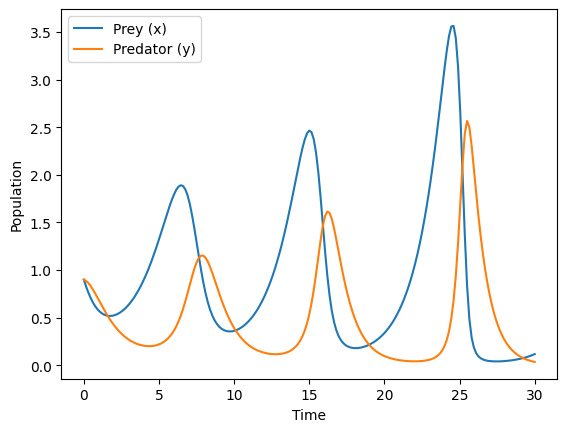

Solving took 0.0009975433349609375 seconds.
dt/timestep: 200 


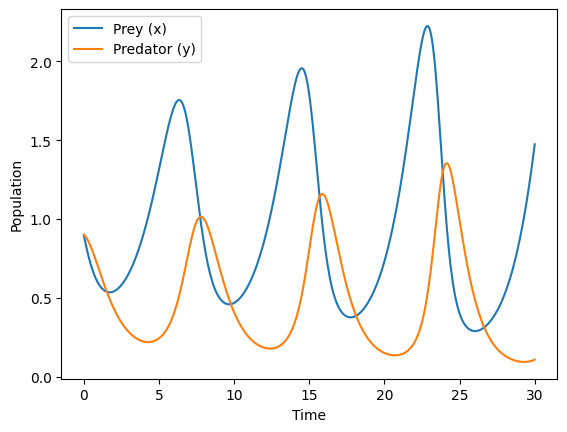

Solving took 0.0019936561584472656 seconds.
dt/timestep: 400 


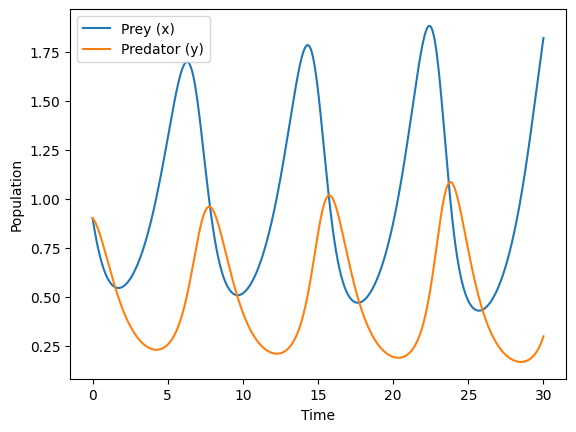

Solving took 0.004985332489013672 seconds.
dt/timestep: 800 


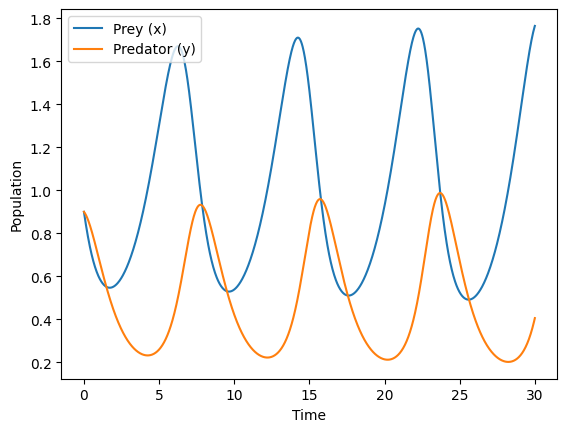

Solving took 0.008974075317382812 seconds.
dt/timestep: 1600 


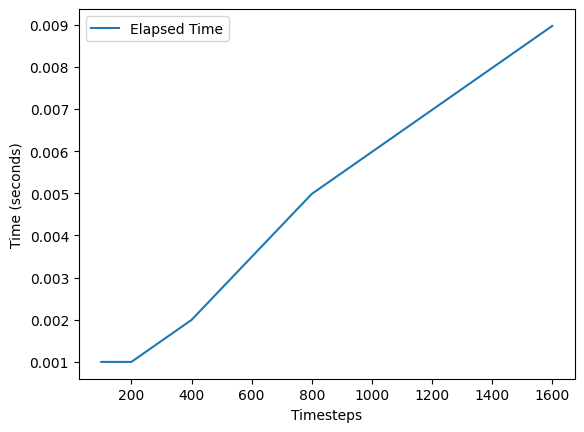

In [5]:
# the timesteps to test
timesteps = [100, 200, 400, 800, 1600]
elapsed_times = []

# set up initial conditions for the second example
initial_conditions_b = np.array([0.9, 0.9])
T_b = 30  # final time
t0_b = 0.0  # time 0

for steps in timesteps:
    dt_b = T_b / steps  # timestep

    start_time = time.time()
    t_b, y_b = eulers_theorem(predator_prey_rhs_b, initial_conditions_b, t0_b, dt_b, T_b)
    end_time = time.time()

    y_b = np.array(y_b)
    plt.plot(t_b, y_b[:, 0], label="Prey (x)")
    plt.plot(t_b, y_b[:, 1], label="Predator (y)")
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.legend()
    plt.show()

    elapsed_time = end_time - start_time
    print(f"Solving took {elapsed_time} seconds.")
    print(f"dt/timestep: {steps} ")

    elapsed_times.append(end_time - start_time)

# Plotting elapsed times
plt.plot(timesteps, elapsed_times, label="Elapsed Time")
plt.xlabel("Timesteps")
plt.ylabel("Time (seconds)")
plt.legend()
plt.show()



# RESULTS

## Test case a:
At < T/100, the graph remained the same for both Heun and 3/8-rule<br>

### Heun Test case a
Method chosen: Heun<br>
dt/timestep: 100 <br>
Solving took 0.001993417739868164 seconds.<br>
Prey Absolute Error: 0.008595450455178254<br>
Prey Relative Error: 0.03537707351389855<br>
Predator Absolute Error: 0.0035654697150368773<br>
Predator Relative Error: 0.038363547586724875<br>

Method chosen: Heun<br>
dt/timestep: 200 <br>
Solving took 0.004986286163330078 seconds.<br>
Prey Absolute Error: 0.0022752799147707633<br>
Prey Relative Error: 0.016759769176414373<br>
Predator Absolute Error: 0.0009358717215757151<br>
Predator Relative Error: 0.019616772196238544<br>

Method chosen: Heun<br>
dt/timestep: 400 <br>
Solving took 0.008976221084594727 seconds.<br>
Prey Absolute Error: 0.0005838989393872673<br>
Prey Relative Error: 0.008119698882336723<br>
Predator Absolute Error: 0.00023943371119367865<br>
Predator Relative Error: 0.009890958401702725<br>

Method chosen: Heun<br>
dt/timestep: 800 <br>
Solving took 0.018918752670288086 seconds.<br>
Prey Absolute Error: 0.00014780497694186806<br>
Prey Relative Error: 0.0039910822819791926<br>
Predator Absolute Error: 6.0532733528919296e-05<br>
Predator Relative Error: 0.004960153281709961<br>

Method chosen: Heun<br>
dt/timestep: 1600 <br>
Solving took 0.03889632225036621 seconds.<br>
Prey Absolute Error: 3.717624541677692e-05<br>
Prey Relative Error: 0.001977861894781562<br>
Predator Absolute Error: 1.5216857067896678e-05<br>
Predator Relative Error: 0.002482420851414555<br>

# 3/8-rule test case a
Method chosen: 3/8-rule<br>
dt/timestep: 100 <br>
Solving took 0.005984067916870117 seconds.<br>
Prey Absolute Error: 5.329483181895638e-06<br>
Prey Relative Error: 0.009914175108828716<br>
Predator Absolute Error: 1.6839212241420512e-06<br>
Predator Relative Error: 0.009923802468696945<br>

Method chosen: 3/8-rule<br>
dt/timestep: 200 <br>
Solving took 0.00997304916381836 seconds.<br>
Prey Absolute Error: 3.353867191031815e-07<br>
Prey Relative Error: 0.004969275692015674<br>
Predator Absolute Error: 1.0642567666865335e-07<br>
Predator Relative Error: 0.004974380705913474<br>

Method chosen: 3/8-rule<br>
dt/timestep: 400 <br>
Solving took 0.01994490623474121 seconds.<br>
Prey Absolute Error: 2.1041309365026412e-08<br>
Prey Relative Error: 0.0024358183570934323<br>
Predator Absolute Error: 6.694033465882291e-09<br>
Predator Relative Error: 0.002465146383976678<br>

Method chosen: 3/8-rule<br>
dt/timestep: 800 <br>
Solving took 0.039893150329589844 seconds.<br>
Prey Absolute Error: 1.3175634431387194e-09<br>
Prey Relative Error: 0.0009041308889532689<br>
Predator Absolute Error: 4.197456110301806e-10<br>
Predator Relative Error: 0.0010507919817667657<br>

Method chosen: 3/8-rule<br>
dt/timestep: 1600 <br>
Solving took 0.07978534698486328 seconds.<br>
Prey Absolute Error: 8.230131175464922e-11<br>
Prey Relative Error: 8.812156155804882e-05<br>
Predator Absolute Error: 2.625856638375839e-11<br>
Predator Relative Error: 0.00015564560942365544<br>

### Eulers test case A
The graph for this looked slightly different to using the solver as the maximal values were not the same.

dt/timestep: 100 <br>
Solving took 0.001995086669921875 seconds.<br>
Prey Absolute Error: 0.08767568346649879<br>
Prey Relative Error: 0.12633758295998426<br>
Predator Absolute Error: 0.07000969516982726<br>
Predator Relative Error: 305215.52356599114<br>

dt/timestep: 200 <br>
Solving took 0.0019936561584472656 seconds.<br>
Prey Absolute Error: 0.04285087018233246<br>
Prey Relative Error: 0.07881334378536309<br>
Predator Absolute Error: 0.0338439003220605<br>
Predator Relative Error: 38356.82301453856<br>

dt/timestep: 400 <br>
Solving took 0.003990650177001953 seconds.<br>
Prey Absolute Error: 0.021202148718914408<br>
Prey Relative Error: 0.04974646863063382<br>
Predator Absolute Error: 0.016656536971596393<br>
Predator Relative Error: 4807.400316134684<br>

dt/timestep: 800 <br>
Solving took 0.006981849670410156 seconds.<br>
Prey Absolute Error: 0.010548092086151026<br>
Prey Relative Error: 0.031848578352677064<br>
Predator Absolute Error: 0.008264437602321578<br>
Predator Relative Error: 601.8663307796874<br>

dt/timestep: 1600 <br>
Solving took 0.013962507247924805 seconds.<br>
Prey Absolute Error: 0.005261165506737418<br>
Prey Relative Error: 0.020727502417715003<br>
Predator Absolute Error: 0.004116568742687019<br>
Predator Relative Error: 75.41622936349086<br>

*note the extremely high relative error for the Predator for eulers method

## Test Case b
Test case b does not have an exact answer, so we cannot calculate the relative or absolute error values.<br>
The graphs remained consistent using the solvers, however the maximal values were increasing when using eulers method<br>

### Heun test case b
Solving took 0.001993894577026367 seconds.<br>
Method chosen: Heun<br>
dt/timestep: 100<br>

Solving took 0.0029921531677246094 seconds.<br>
Method chosen: Heun<br>
dt/timestep: 200<br>

Solving took 0.00698089599609375 seconds.<br>
Method chosen: Heun<br>
dt/timestep: 400<br>

Solving took 0.011968612670898438 seconds.<br>
Method chosen: Heun<br>
dt/timestep: 800<br>

Solving took 0.023935317993164062 seconds.<br>
Method chosen: Heun<br>
dt/timestep: 1600<br>

### 3/8-rule test case b
Solving took 0.005984783172607422 seconds.<br>
Method chosen: 3/8-rule<br>
dt/timestep: 100<br>

Solving took 0.006981611251831055 seconds.<br>
Method chosen: 3/8-rule<br>
dt/timestep: 200<br>

Solving took 0.013992071151733398 seconds.<br>
Method chosen: 3/8-rule<br>
dt/timestep: 400<br>

Solving took 0.02792501449584961 seconds.<br>
Method chosen: 3/8-rule<br>
dt/timestep: 800<br>

Solving took 0.05584979057312012 seconds.<br>
Method chosen: 3/8-rule<br>
dt/timestep: 1600<br>

### Eulers Method test case b
Solving took 0.0009968280792236328 seconds.<br>
dt/timestep: 100 <br>

Solving took 0.0009963512420654297 seconds.<br>
dt/timestep: 200 <br>

Solving took 0.0019941329956054688 seconds.<br>
dt/timestep: 400 <br>

Solving took 0.003989458084106445 seconds.<br>
dt/timestep: 800 <br>

Solving took 0.007978677749633789 seconds.<br>
dt/timestep: 1600<br>



# ANALYSIS

